<h1> Epsilon Greedy Method </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
def normalise(array):
    maximum=max(array)
    minimum=min(array)
    for i in range(len(array)):
        array[i]=(array[i]-minimum)/(maximum-minimum)
    return array

In [3]:
def epsilon_greedy(k,eps,iterations,mu='random'):
    
    #k=number of arms
    #eps=exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if eps==0 and step==0: #eps value indicated exploitation but since the steps are also zero there is no knowledge to exploit-randomly select any arm
            a=np.random.choice(k) #action is chosen
        
        elif p<eps: #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [4]:
k=10 #number of arms
episodes=1000 #no of times the total experiments are conducted
iterations=1000 #no of pulls in 1 episode
mu=np.random.normal(0,1,k) #true expected rewards of all the 10 arms-all rewards are sampled from normal distributions with sttd-dev 1 

#long term rewards- avg rewards over all the episodes
reward_1_long=np.zeros(iterations)
reward_01_long=np.zeros(iterations)
reward_0_long=np.zeros(iterations)

#long term arm pulls- avg number of pulls of each arm over all the episodes
arm_pulls1_long=np.zeros(k)
arm_pulls01_long=np.zeros(k)
arm_pulls0_long=np.zeros(k)


for i in tqdm(range(episodes)):
    q_1,avg_reward_1,arm_pull_number1=epsilon_greedy(k,0.1,iterations,mu)
    q_01,avg_reward_01,arm_pull_number01=epsilon_greedy(k,0.01,iterations,mu)
    q_0,avg_reward_0,arm_pull_number0=epsilon_greedy(k,0,iterations,mu)

    
    #updating the long term rewards
    reward_1_long=reward_1_long+(avg_reward_1-reward_1_long)/(i+1)
    reward_01_long=reward_01_long+(avg_reward_01-reward_01_long)/(i+1)
    reward_0_long=reward_0_long+(avg_reward_0-reward_0_long)/(i+1)
    
    #updating the long term arm pulls
    arm_pulls1_long=arm_pulls1_long+(arm_pull_number1-arm_pulls1_long)/(i+1)
    arm_pulls01_long=arm_pulls01_long+(arm_pull_number01-arm_pulls01_long)/(i+1)
    arm_pulls0_long=arm_pulls0_long+(arm_pull_number0-arm_pulls0_long)/(i+1)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.29it/s]


<h1> Graphical Analysis-Epsilon Greedy Method </h1>

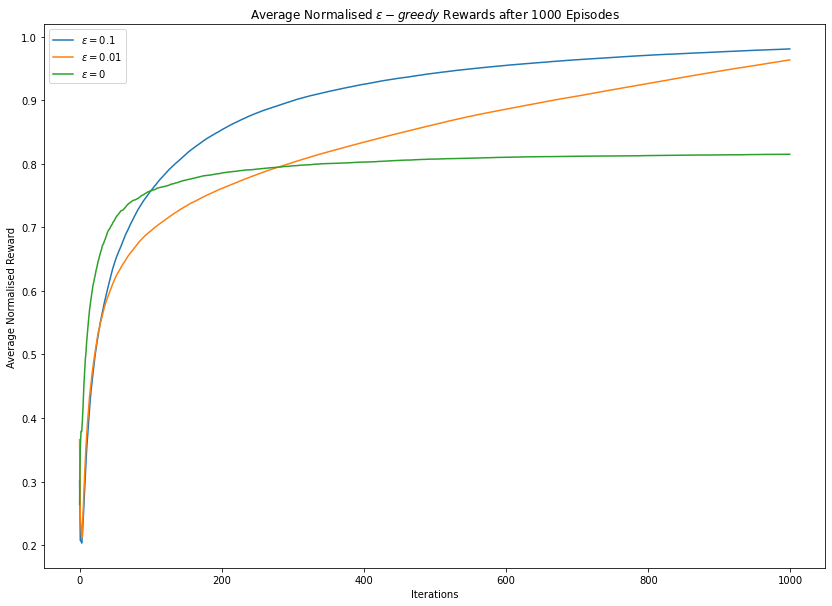

In [5]:
plt.figure(figsize=(14,10))
plt.plot(reward_1_long, label="$\epsilon=0.1$")
plt.plot(reward_01_long, label="$\epsilon=0.01$")
plt.plot(reward_0_long, label="$\epsilon=0$")
plt.xlabel("Iterations")
plt.ylabel("Average Normalised Reward")
plt.title("Average Normalised $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.legend()
plt.show()

<h1> Quantitative Analysis-Epsilon Greedy Method </h1>

In [49]:
print("the most optimal arm: ")
optimal_index=np.argmax(mu) 
optimal_arm=optimal_index+1 #indexing starts from 0
print(optimal_arm)

the most optimal arm: 
6


In [50]:
expected_values=np.vstack((mu,q_1,q_01,q_0))
data=pd.DataFrame(expected_values)
data.columns=["arm "+str(i) for i in range(1,11)]
data.index=["True Expected Reward", "Estimated Expected Reward for $\epsilon=0.1$",
            "Estimated Expected Reward for $\epsilon=0.01$","Estimated Expected Reward for $\epsilon=0$"]
data

,arm 1,arm 2,arm 3,arm 4,arm 5,arm 6,arm 7,arm 8,arm 9,arm 10
True Expected Reward,0.095049,-1.363854,-0.108745,-1.397811,1.396469,2.572001,2.040232,-1.613037,-1.259565,-1.412514
Estimated Expected Reward for $\epsilon=0.1$,-0.260800,-1.143207,0.189275,-1.303580,1.487136,2.653193,2.041949,-2.030662,-1.093540,-1.172814
Estimated Expected Reward for $\epsilon=0.01$,0.523186,-1.103808,0.680473,-0.627907,1.332287,2.582368,1.741890,-1.978244,-3.813836,0.000000
Estimated Expected Reward for $\epsilon=0$,-0.168074,-1.680599,-1.027091,-2.276172,1.382565,0.000000,0.000000,0.000000,-1.651872,0.000000


-for eps=0.1 estimated expected reward for the most optimal arm (arm 6) has converged to the true value

-for eps=0.01 the estimated expected reward for the most optimal arm (arm 6) has converged to the true value

-for eps=0 (greedy) the estimated expected reward for the most optimal arm (arm 6) has not converged to the true value

<h1> Percentage Arm Pulls-Epsilon Greedy Method </h1>

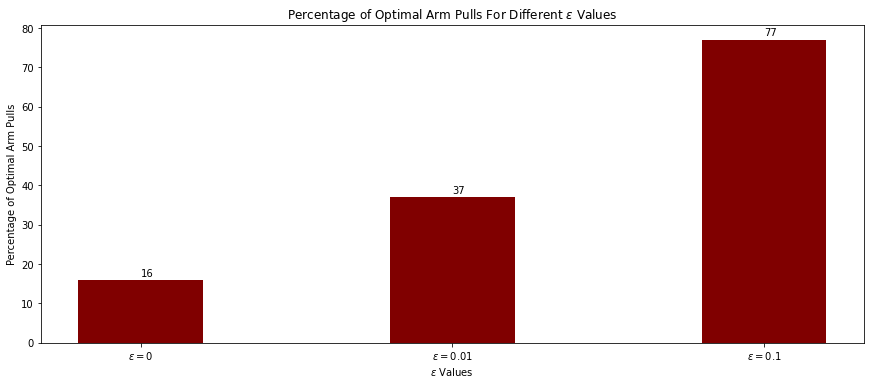

In [70]:
#calculating the percentage optimum arm pulls over the total number of pulls for each epsilon

percent_optimal_pull_1=round((arm_pulls1_long[optimal_index]/np.sum(arm_pulls1_long))*100)
percent_optimal_pull_01=round((arm_pulls01_long[optimal_index]/np.sum(arm_pulls01_long))*100)
percent_optimal_pull_0=round((arm_pulls0_long[optimal_index]/np.sum(arm_pulls0_long))*100)

eps_val = ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"]
percent_optimal_pull=[percent_optimal_pull_0,percent_optimal_pull_01,percent_optimal_pull_1]
  
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(eps_val,percent_optimal_pull,color="maroon",width=0.4)
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index,data in enumerate(percent_optimal_pull):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.xlabel("$\epsilon$ Values")
plt.ylabel("Percentage of Optimal Arm Pulls")
plt.title("Percentage of Optimal Arm Pulls For Different $\epsilon$ Values ")
plt.show()

-eps=0.1 the optimal arm is pulled 77% of the time 

-eps=0.01 the optimal arm is pulled 37% of the time 

-eps=0 (greedy) the optimal arm is pulled only 16% of the time 